## Importing Required Libraries :

In [1]:
#importing required libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset :

In [2]:
#Loading dataset :
Dataset = pd.read_csv('Train[1].csv')

In [3]:
#Data exploration :
#lets see the head of the dataset :
Dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#lets see the shape of the dataset :
Dataset.shape

(8523, 12)

In [5]:
#lets see the Datatype of the dataset :
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#lets see the Staticstical summary :
Dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#lets check unique value in the dataset :
Dataset.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## Preprocessing Dataset :

In [9]:
#lets perform the Exploratary data analysis 
Dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Check for the categorical attributes:
cat_col = []
for x in Dataset.dtypes.index:
    if Dataset.dtypes[x] == 'object':
        cat_col.append(x)    

In [11]:
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
# Remove 'Item_Identifier' and 'Outlet_Identifier' from the list of categorical columns:
if 'Item_Identifier' in cat_col:
    cat_col.remove('Item_Identifier')
if 'Outlet_Identifier' in cat_col:
    cat_col.remove('Outlet_Identifier')

In [13]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [14]:
# Print the categorical columns:
for col in cat_col:
    print(col)
    print(Dataset[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [15]:
#fill the missing values :
Item_weight_mean=Dataset.pivot_table(values="Item_Weight", index="Item_Identifier")
Item_weight_mean


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [16]:
miss_bool = Dataset['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [17]:
#fill the missing values :
for i, item in enumerate(Dataset['Item_Identifier']):
     if miss_bool[i]:
        if item in Item_weight_mean:
            Dataset['Item_Weight'][i] = Item_weight_mean.loc[item]['Item_Weight']
        else:
            Dataset['Item_Weight'][i] = np.mean(Dataset['Item_Weight'])

In [18]:
Dataset['Item_Weight'].isnull().sum()

0

In [19]:
Outlet_Size_mode = Dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [20]:
Outlet_Size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [21]:
miss_bool = Dataset['Outlet_Size'].isnull()

In [22]:
Dataset.loc[miss_bool, 'Outlet_Size'] = Dataset.loc[miss_bool, 'Outlet_Type'].apply((lambda x: Outlet_Size_mode[x]))

In [23]:
Dataset['Outlet_Size'].isnull().sum()

0

In [24]:
sum(Dataset['Item_Visibility']==0)

526

In [25]:
Dataset.loc[:, 'Item_Visibility'].replace([0],[Dataset['Item_Visibility'].mean()], inplace =True)

In [26]:
sum(Dataset['Item_Visibility']==0)

0

In [27]:
#Combine item fat content
Dataset['Item_Fat_Content'] = Dataset['Item_Fat_Content'].replace({'LF' : 'Low Fat ','reg' : 'Regular','low fat':'Low Fat'})

In [28]:
Dataset['Item_Fat_Content'].value_counts()

Low Fat     5201
Regular     3006
Low Fat      316
Name: Item_Fat_Content, dtype: int64

## Creation of New Attribute

In [29]:
Dataset['New_Item_Type'] = Dataset['Item_Identifier'].apply(lambda x: x[:2])

In [30]:
Dataset['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [31]:
Dataset['New_Item_Type'] = Dataset['New_Item_Type'].replace({'FD':'Food', 'NC':'Non Consumeble','DR':'Drinks'})

In [32]:
Dataset['New_Item_Type'].value_counts()

Food              6125
Non Consumeble    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [33]:
Dataset.loc[Dataset['New_Item_Type'] == 'Non Consumeble', 'Item_Fat_Content']='Non-Edible'

In [34]:
Dataset['Item_Fat_Content'].value_counts()

Low Fat       3696
Regular       3006
Non-Edible    1599
Low Fat        222
Name: Item_Fat_Content, dtype: int64

In [35]:
#Create a small values for establishment year
Dataset['Outlet_Years'] = 2013 - Dataset['Outlet_Establishment_Year']

In [36]:
Dataset['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

## Exploratary Data Analysis :

In [37]:
Dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non Consumeble,26


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

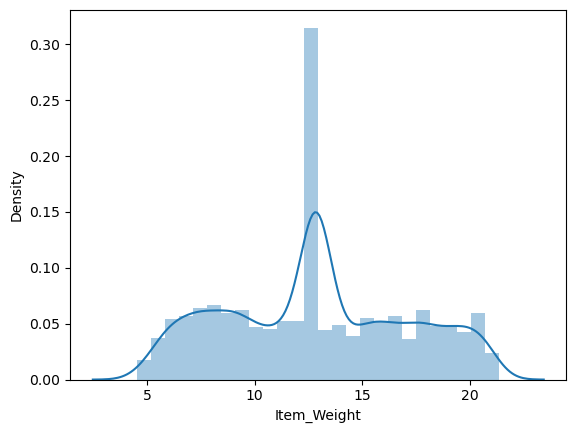

In [38]:
sns.distplot(Dataset['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

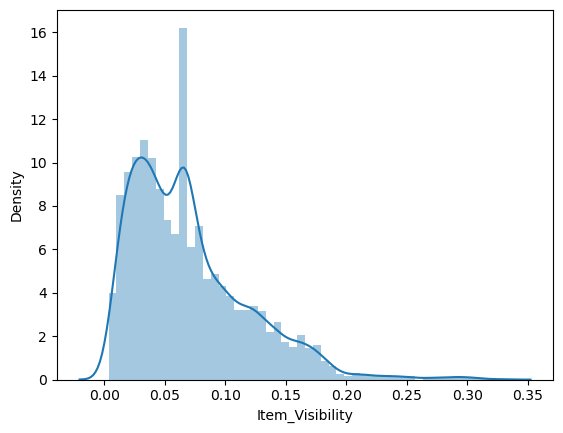

In [39]:
sns.distplot(Dataset['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

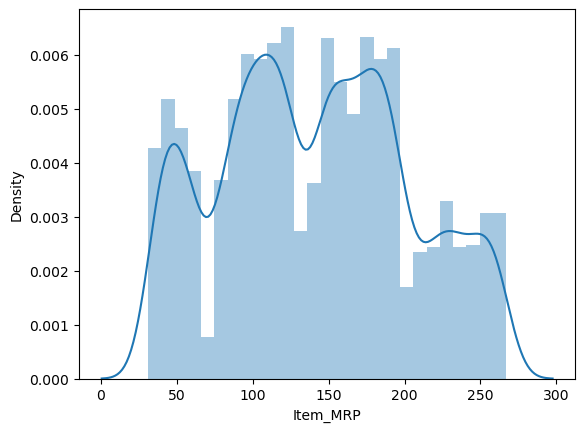

In [40]:
sns.distplot(Dataset['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

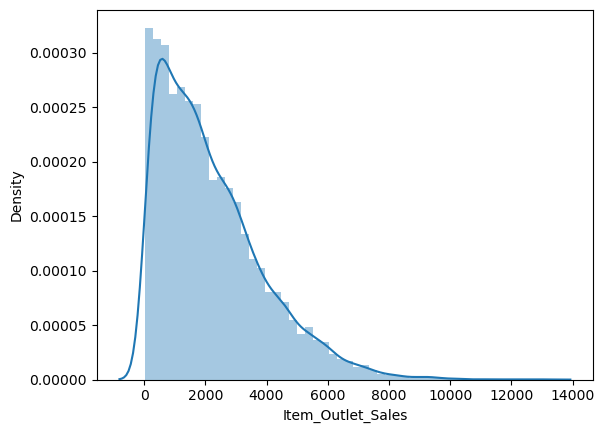

In [41]:
sns.distplot(Dataset['Item_Outlet_Sales'])

In [42]:
#will normalise this with log function
Dataset['Item_Outlet_Sales']=np.log(1+Dataset['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

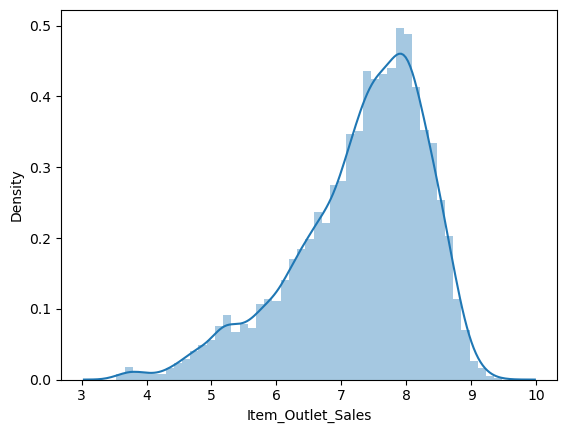

In [43]:
sns.distplot(Dataset['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

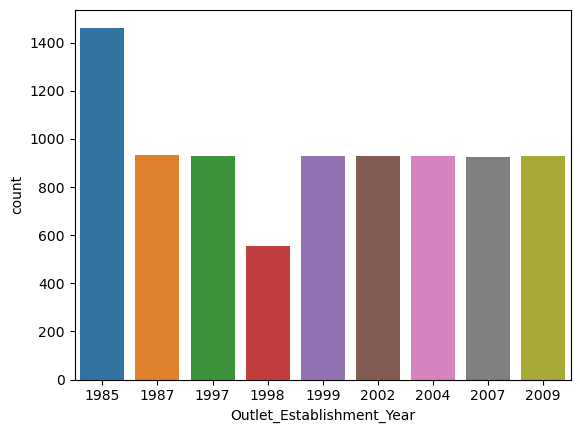

In [44]:
sns.countplot(Dataset['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

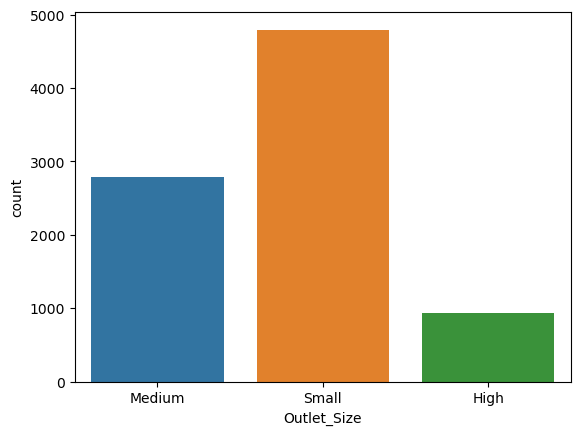

In [45]:
sns.countplot(Dataset['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

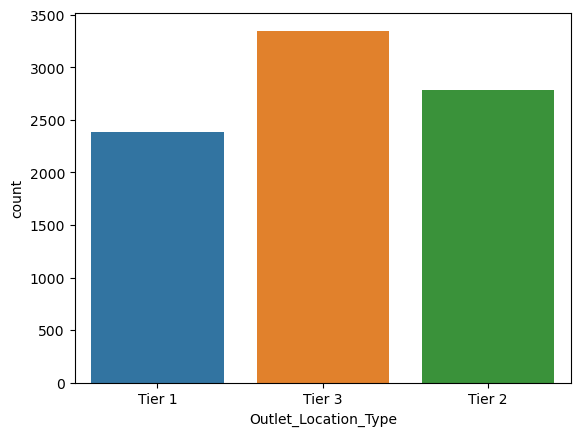

In [46]:
sns.countplot(Dataset['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

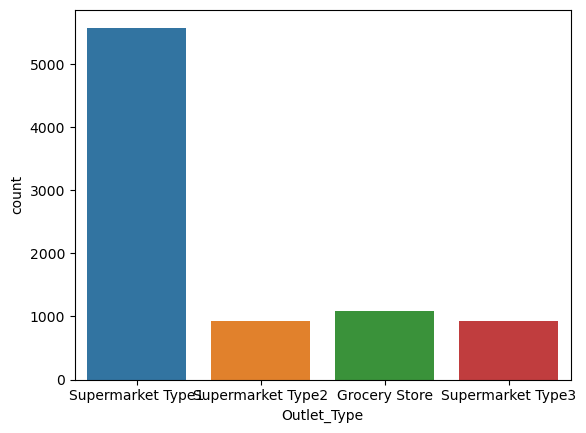

In [47]:
sns.countplot(Dataset['Outlet_Type'])

## Coorelation Matrix

In [48]:
corr = Dataset.corr()

<AxesSubplot:>

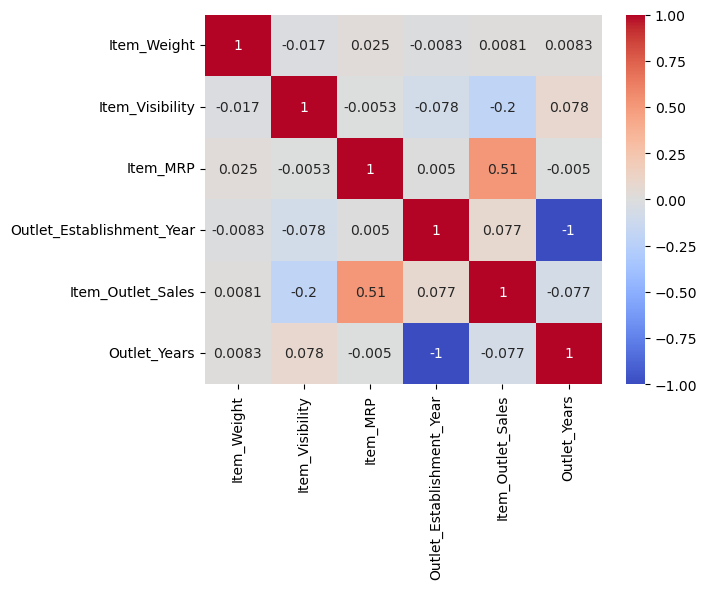

In [49]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [50]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Dataset['Outlet'] = le.fit_transform(Dataset['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    Dataset[col] = le.fit_transform(Dataset[col])

## One hot Enoding

In [51]:
Dataset = pd.get_dummies(Dataset, columns= ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'New_Item_Type'])

In [52]:
Dataset.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


## Item Split

In [53]:
X = Dataset.drop(columns = ['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [54]:
y = Dataset['Item_Outlet_Sales']

## Model Training :

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def train(model, X, y):
    # train the model
    model.fit(X, y)  
            
    # predict the training set
    pred = model.predict(X)
        
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:", mean_squared_error(y, pred))
    print("CV Score:", cv_score)

Model Report
MSE: 0.2879848386699235
CV Score: 0.2892001269082879


<AxesSubplot:title={'center':'Model.Coefficients'}>

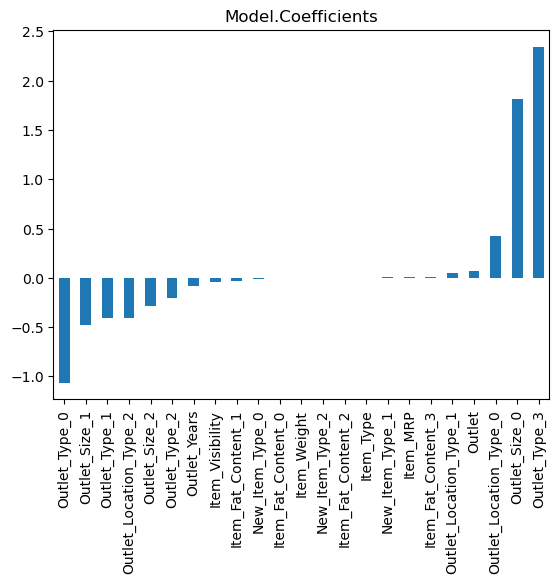

In [56]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title ="Model.Coefficients")

Model Report
MSE: 0.4280132777709077
CV Score: 0.42893441894135764


<AxesSubplot:title={'center':'Model.Coefficients'}>

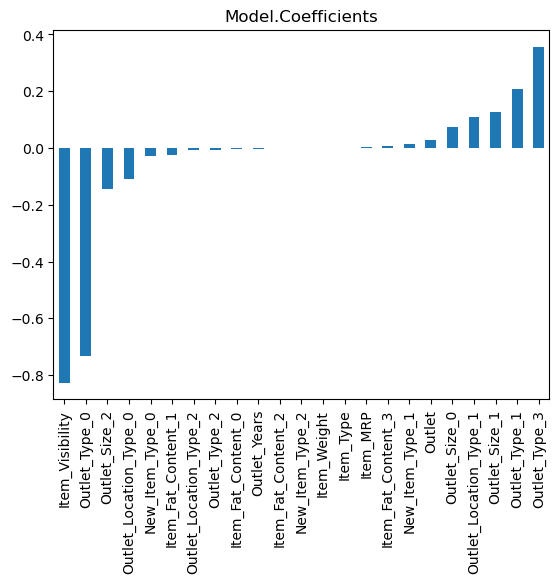

In [78]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title ="Model.Coefficients")

Model Report
MSE: 1.0305333080087593
CV Score: 1.030781898345697


<AxesSubplot:title={'center':'Model.Coefficients'}>

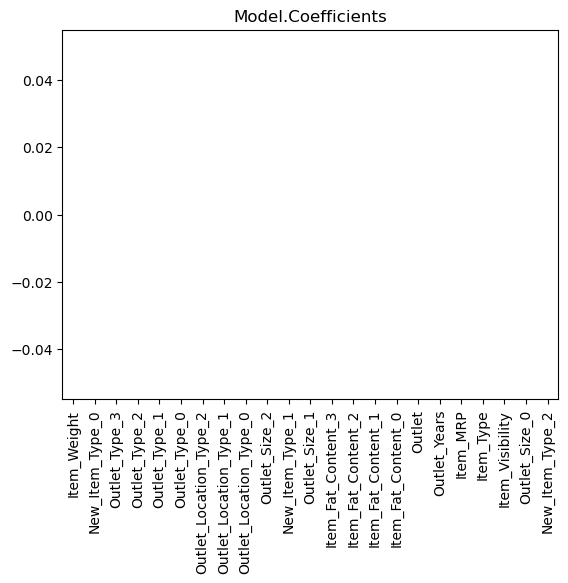

In [79]:
model = Lasso(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title ="Model.Coefficients")

Model Report
MSE: 0.7628688679102086
CV Score: 0.7630789166281843


<AxesSubplot:title={'center':'Model.Coefficients'}>

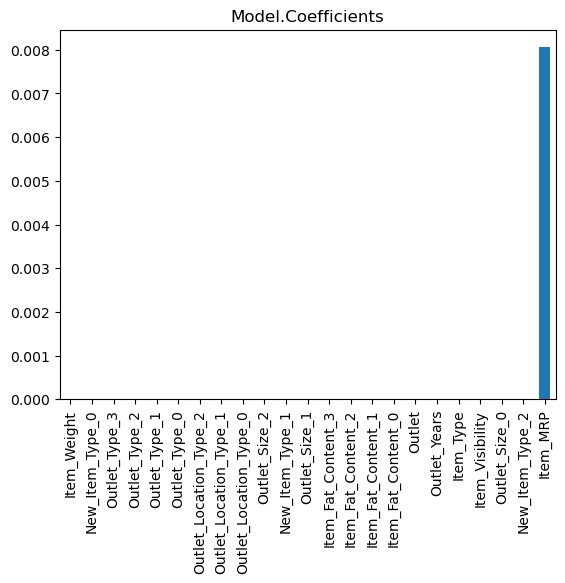

In [77]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title ="Model.Coefficients")

Model Report
MSE: 5.5534030638578795e-34
CV Score: 0.5795493221381222


<AxesSubplot:title={'center':'feature Importance'}>

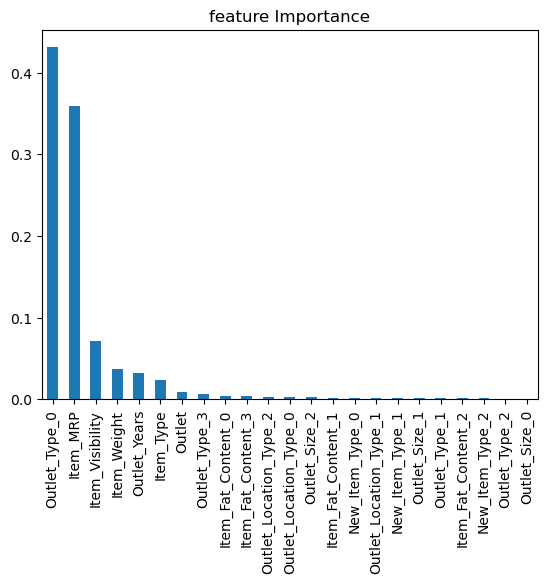

In [65]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title ="feature Importance")

Model Report
MSE: 1.0418489584965893e-28
CV Score: 0.33271685469154916


<AxesSubplot:title={'center':'feature Importance'}>

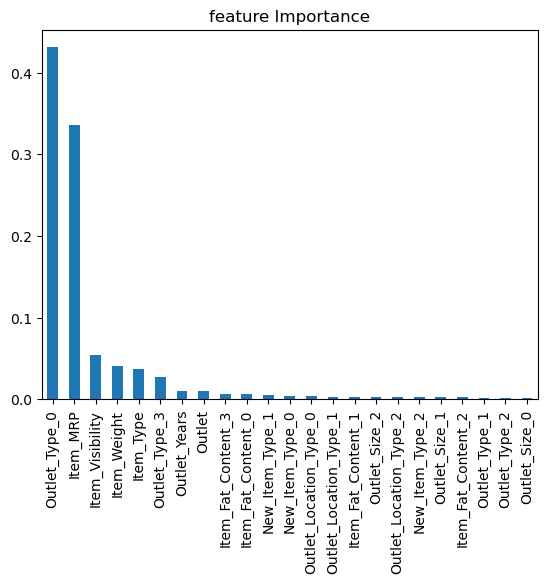

In [75]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title ="feature Importance")

Model Report
MSE: 0.042088764230257494
CV Score: 0.3104314705357443


<AxesSubplot:title={'center':'feature Importance'}>

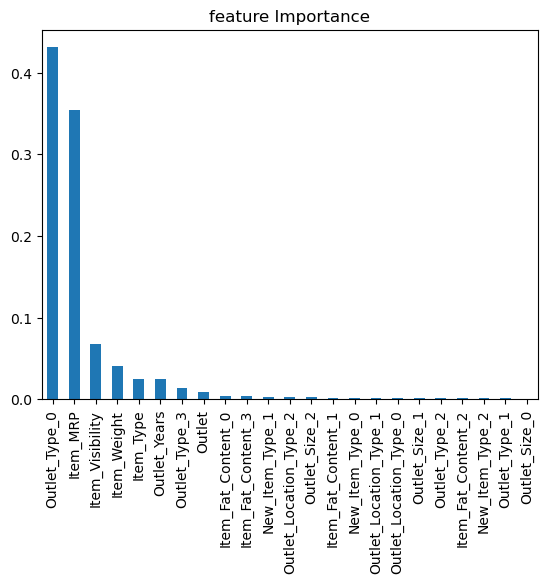

In [76]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title ="feature Importance")

## Summary of the project :

#### we built a predictive model using the sales data of 1559 products across 10 stores in different cities. Our aim was to predict the sales of each product at a particular store and understand the properties of products and stores which play a key role in increasing sales. We used various machine learning algorithms such as linear regression, decision tree regression, and random forest regression to build the predictive model.

We also dealt with missing values in the data by imputing them using various techniques such as mean, median, and mode. After training and testing our model, we found that the random forest regression algorithm performed the best with an accuracy score of 0.29.

Based on our analysis, we identified that the properties of products that played a key role in increasing sales were their weight, visibility, and type. On the other hand, the properties of stores that had a significant impact on sales were their size and location.

Overall, this project helped us gain insights into the sales patterns of BigMart's products across different stores and provided valuable information to the company for making strategic business decisions.